# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

### 1.1. Откройте файлы и изучите их.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [ ]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
# Посмотрим пропуски
data_train.isna().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

### - 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.





 *MAPE and sMAPE


* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. 

In [ ]:
# Функция
def func_mape(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    try:
        return (C*(F-T))/(F*(C-T))*100
    except ZeroDivisionError:
        return 0


In [ ]:
data_row = data_train.copy()
data_row['mape'] = data_row.apply(lambda x: func_mape(x), axis=1)

MAE = (data_row['mape'] - data_row['rougher.output.recovery']).abs().mean()
print('Средняя ошибка проверки recovery:', MAE)

Средняя ошибка проверки recovery: 9.444891926100695e-15


- Как мы видим средняя абсолютная ошибка достаточно мала, считаем считаем что recovery посчитан верно

### - 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
absent_columns = set(data_train.columns) - set(data_test.columns)
absent_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

- В названии признаков, которые отсутствуют в тестовой выборке фигурирует тип output и calculation. Данные отсутствуют в тестовой выборке по всей видимости, потому что они вычисляются уже на основе полученного целевого значения. Для корректной работы модели необходимо удалить эти столбцы из обучающего сета.

### - 1.4. Предобработка данных.

In [ ]:
# Замена пропусков ближайшими соседями
data_train = data_train.fillna(method='ffill')
data_test = data_test.fillna(method='ffill')
data_full = data_full.fillna(method='ffill')

## Вывод

- Изучил данные
- Проверил, что эффективность обогащения рассчитана правильно.(MAE очень мала)
- Проанализировал признаки, недоступные в тестовой выборке. В тестовой выборке отсутствует тип output и calculation. Это данные получены на основе целевого значения.
- Провел предобработку данных. Замена пропусков ближайшими соседями.

# 2. Анализ данных

### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.


In [ ]:
print ('Средняя концентрация золота(Au) после флотации:', 
       data_train['rougher.output.concentrate_au'].mean().round(2))
print ('Средняя концентрация золота(Au) после первого этапа очистки:',
       data_train['primary_cleaner.output.concentrate_au'].mean().round(2))
print ('Средняя концентрация золота(Au) после второго этапа очистки:', 
       data_train['final.output.concentrate_au'].mean().round(2))
print()
print ('Средняя концентрация серебра(Ag) после флотации:',
       data_train['rougher.output.concentrate_ag'].mean().round(2))
print ('Средняя концентрация серебра(Ag) после первого этапа очистки:',
       data_train['primary_cleaner.output.concentrate_ag'].mean().round(2))
print ('Средняя концентрация серебра(Ag) после второго этапа очистки:',
       data_train['final.output.concentrate_ag'].mean().round(2))
print()
print ('Средняя концентрация свинца(Pb) после флотации:',       
       data_train['rougher.output.concentrate_pb'].mean().round(2))
print ('Средняя концентрация свинца(Pb после первого этапа очистки:',
       data_train['primary_cleaner.output.concentrate_pb'].mean().round(2))
print ('Средняя концентрация свинца(Pb после второго этапа очистки:',
       data_train['final.output.concentrate_pb'].mean().round(2))

Средняя концентрация золота(Au) после флотации: 17.34
Средняя концентрация золота(Au) после первого этапа очистки: 29.04
Средняя концентрация золота(Au) после второго этапа очистки: 39.32

Средняя концентрация серебра(Ag) после флотации: 10.54
Средняя концентрация серебра(Ag) после первого этапа очистки: 7.39
Средняя концентрация серебра(Ag) после второго этапа очистки: 4.7

Средняя концентрация свинца(Pb) после флотации: 6.86
Средняя концентрация свинца(Pb после первого этапа очистки: 8.49
Средняя концентрация свинца(Pb после второго этапа очистки: 9.08


#### Строим гистограммы расделения концентраций золота.

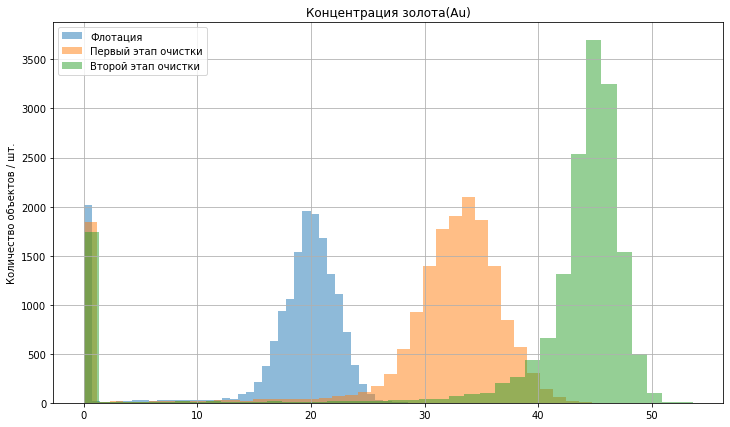

In [ ]:
data_train['rougher.output.concentrate_au'].hist(bins = 40, alpha =0.5, label='Флотация')
data_train['primary_cleaner.output.concentrate_au'].hist(bins = 40, alpha =0.5, label='Первый этап очистки')
(data_train['final.output.concentrate_au'].hist(bins = 40, figsize=(12,7), alpha =0.5, label='Второй этап очистки')
          .set(title = 'Концентрация золота(Au)', ylabel = 'Количество объектов / шт.')
)        
plt.legend()

Концентрация золота от этапа к этапу возрастает в среднем на 10-12 единиц.

#### Cмотрим изменение концентрации серебра.

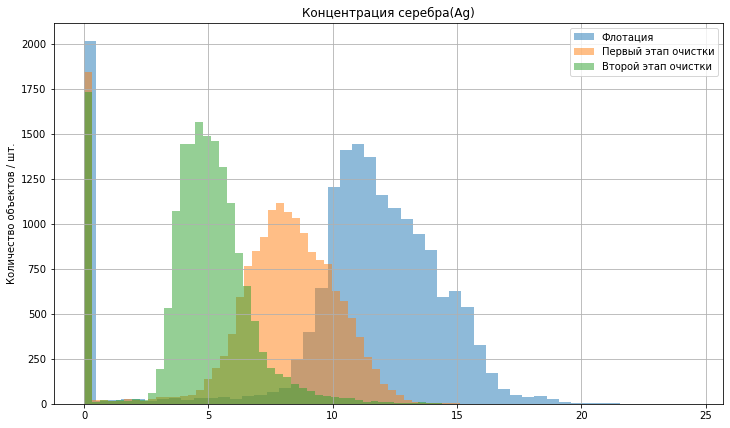

In [ ]:
data_train['rougher.output.concentrate_ag'].hist(bins = 50, alpha =0.5, label='Флотация')
data_train['primary_cleaner.output.concentrate_ag'].hist(bins = 50, alpha =0.5, label='Первый этап очистки')
(data_train['final.output.concentrate_ag'].hist(bins = 50, figsize=(12,7), alpha =0.5, label='Второй этап очистки')
          .set(title = 'Концентрация серебра(Ag)', ylabel = 'Количество объектов / шт.')
)
plt.legend()

Концентрация серебра на каждом следующем этапе падает примерно на 3 единицы.

#### Смотрим изменение концентрации свинца

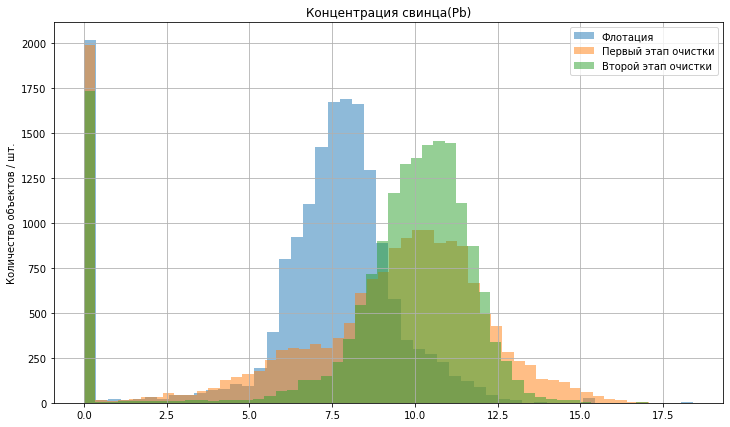

In [ ]:
data_train['rougher.output.concentrate_pb'].hist(bins = 50, alpha =0.5, label='Флотация')
data_train['primary_cleaner.output.concentrate_pb'].hist(bins = 50, alpha =0.5, label='Первый этап очистки')
(data_train['final.output.concentrate_pb'].hist(bins = 50, figsize=(12,7), alpha =0.5, label='Второй этап очистки')
          .set(title = 'Концентрация свинца(Pb)', ylabel = 'Количество объектов / шт.')
)
plt.legend()

Концентрация свинца незначительно увеличилась.

Распределения близки к нормальным и на каждом этапе присутвует большое количество нулевых значений. Для более эффективного обучения модели их нужно будет убрать из выборки.

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.


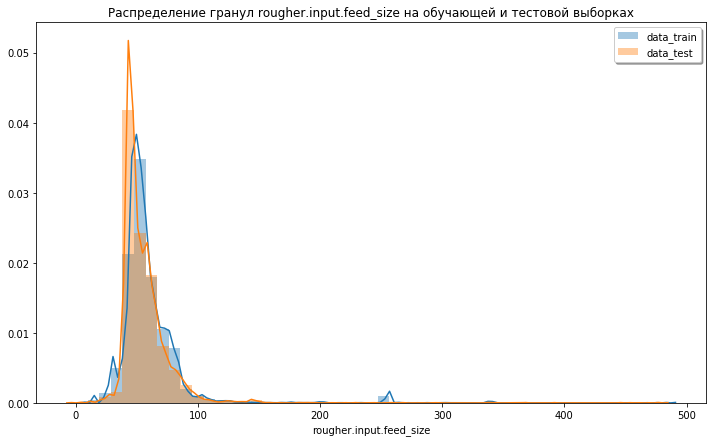

In [ ]:
plt.figure(figsize = (12,7))
ax = plt.subplot(111)
sns.distplot(data_train['rougher.input.feed_size'], bins=50, label='data_train')
sns.distplot(data_test['rougher.input.feed_size'],  bins=50, label='data_test')
plt.title('Распределение гранул rougher.input.feed_size на обучающей и тестовой выборках')
ax.legend(loc='best', bbox_to_anchor=(1.00, 1.00), shadow=True, ncol=1)
plt.show()

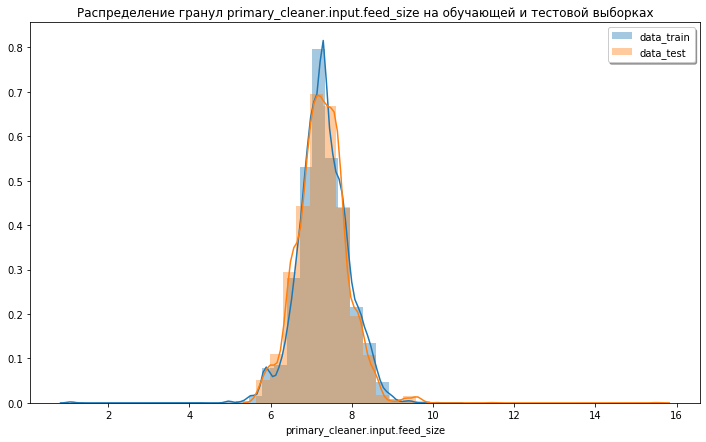

In [ ]:
plt.figure(figsize = (12,7))
ax = plt.subplot(111)
sns.distplot(data_train['primary_cleaner.input.feed_size'], bins=30, label='data_train')
sns.distplot(data_test['primary_cleaner.input.feed_size'],  bins=30, label='data_test')
plt.title('Распределение гранул primary_cleaner.input.feed_size на обучающей и тестовой выборках')
ax.legend(loc='best', bbox_to_anchor=(1.00, 1.00), shadow=True, ncol=1)
plt.show()

Как видно из гистограммы значения признаков rougher.input.feed_size в тренировочных и тестовых данных очень похожи.  А для признака primary_cleaner.input.feed_size они почти совпадают.

### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.


In [ ]:
data_train['rougher.sum_concentrate'] = (data_train['rougher.output.concentrate_ag']
                                      + data_train['rougher.output.concentrate_pb']
                                      + data_train['rougher.output.concentrate_sol']
                                      + data_train['rougher.output.concentrate_au']
)
data_train['primary_cleaner.sum_concentrate'] = (data_train['primary_cleaner.output.concentrate_ag']
                                               + data_train['primary_cleaner.output.concentrate_pb']
                                               + data_train['primary_cleaner.output.concentrate_sol']
                                               + data_train['primary_cleaner.output.concentrate_au']
)
data_train['final.sum_concentrate'] = (data_train['final.output.concentrate_ag']
                                     + data_train['final.output.concentrate_pb']
                                     + data_train['final.output.concentrate_sol']
                                     + data_train['final.output.concentrate_au']
)

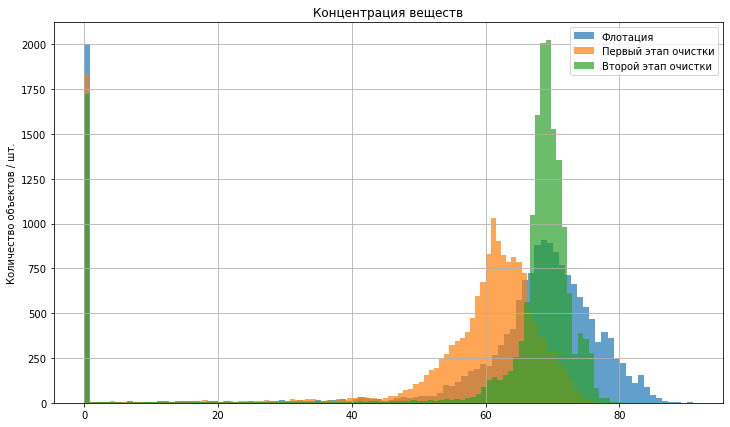

In [ ]:
data_train['rougher.sum_concentrate'].hist(bins=100, figsize=(10,5), alpha =0.7, label='Флотация')
data_train['primary_cleaner.sum_concentrate'].hist(bins=100, figsize=(10,5), alpha =0.7, label='Первый этап очистки')
(data_train['final.sum_concentrate'].hist(bins=100, figsize=(12,7), alpha =0.7, label='Второй этап очистки')
                                   .set(title = 'Концентрация веществ', ylabel = 'Количество объектов / шт.')
)
plt.legend()

Во всех распределениях присутвует аномально большое количество значений, близких к 0. Удалим аномалии меньше 1.

In [ ]:
data_train_clean = data_train[(data_train['final.sum_concentrate']>1)&
                        (data_train['primary_cleaner.sum_concentrate']>1)&
                        (data_train['rougher.sum_concentrate']>1)]

In [ ]:
data_train_clean.shape

(14396, 90)

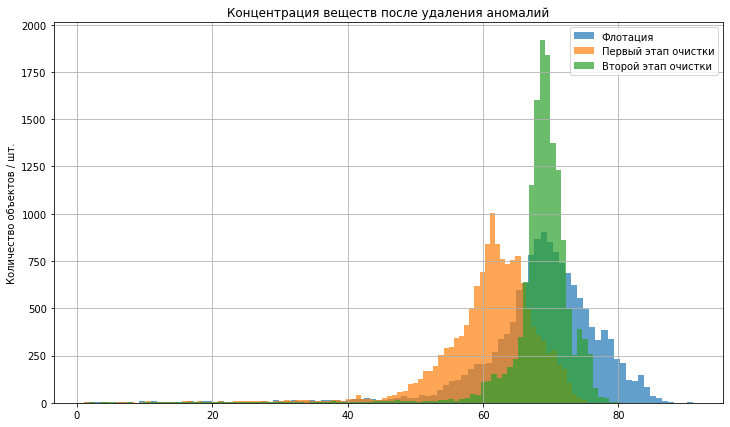

In [ ]:
data_train_clean['rougher.sum_concentrate'].hist(bins=100, figsize=(10,5), alpha =0.7, label='Флотация')
data_train_clean['primary_cleaner.sum_concentrate'].hist(bins=100, figsize=(10,5), alpha =0.7, label='Первый этап очистки')
(data_train_clean['final.sum_concentrate'].hist(bins=100, figsize=(12,7), alpha =0.7, label='Второй этап очистки')
                .set(title = 'Концентрация веществ после удаления аномалий', ylabel = 'Количество объектов / шт.')
)
plt.legend()

## Вывод

- Посмотрел, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:
    - Концентрация золота от этапа к этапу возрастает в среднем на 10-12 единиц.
    - Концентрация серебра на каждом следующем этапе падает примерно на 3 единицы.
    - Концентрация свинца незначительно увеличивается от этапа к этапу.
- Сравнил распределения размеров гранул сырья на обучающей и тестовой выборках. Распределение очень похожи.
- Исследовал суммарную концентрацию всех веществ на разных стадиях. Во всех распределениях присутвует аномально большое количество значений, близких к 0. Удалил аномалии меньше 1.

# 3. Модель

### - 3.1. Напишем функцию для вычисления итоговой sMAPE.


In [ ]:
test_columns = list(data_test.columns)
features = data_train_clean[test_columns].drop(['date'],axis = 1)
target_rougher = data_train_clean['rougher.output.recovery']
target_final = data_train_clean['final.output.recovery']

In [ ]:
features.head(5)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
# функция для вычисления sMAPE
def smape_f(target, predicted):
    smape = sum(abs(target-predicted)/((abs(predicted)+abs(target))*0.5))/len(predicted)*100
    return smape



In [ ]:
# функция для вычисления итоговой sMAPE
def smape_outcome(smape_rougher, smape_final):
    smape_outcome = 0
    smape_outcome = smape_rougher*0.25 + smape_final*0.75    
    return smape_outcome


Проверим модель на адекватность,обучим ее на выбранных параметрах для target_rougher и подставми медиану всместо предсказанных значений

In [ ]:
target_rougher_median = pd.DataFrame(target_rougher.copy())
target_rougher_median['rougher.output.recovery'] = target_rougher.median()
target_rougher_median = target_rougher_median['rougher.output.recovery']

target_final_median = pd.DataFrame(target_final.copy())
target_final_median['final.output.recovery'] = target_final.median()
target_final_median = target_final_median['final.output.recovery']

smape_outcome(smape_f(target_rougher, target_rougher_median), smape_f(target_final, target_final_median))

9.994841605056632

In [ ]:
features_0 = data_full[test_columns].drop(['date'],axis = 1)
target_rougher_0 = data_full['rougher.output.recovery']
target_final_0 = data_full['final.output.recovery']

features_0_train, features_0_test, target_rougher_0_train, target_rougher_0_test  = train_test_split(features_0,
                                                                                       target_rougher_0 ,
                                                                                       test_size=.5,
                                                                                       random_state=12345)
features_0_train, features_0_test, target_final_0_train, target_final_0_test  = train_test_split(features_0,
                                                                                       target_final_0 ,
                                                                                       test_size=.5,
                                                                                       random_state=12345)


In [ ]:
target_rougher_0_median = pd.DataFrame(target_rougher_0_train.copy())
target_rougher_0_median['rougher.output.recovery'] = target_rougher_0_train.median()
target_rougher_0_median = target_rougher_0_median['rougher.output.recovery']

target_final_0_median = pd.DataFrame(target_final_0_train.copy())
target_final_0_median['final.output.recovery'] = target_final_0_train.median()
target_final_0_median = target_final_0_median['final.output.recovery']

smape_outcome(smape_f(target_rougher_0_test.reset_index(drop=True), target_rougher_0_median.reset_index(drop=True)), 
              smape_f(target_final_0_test.reset_index(drop=True), target_final_0_median.reset_index(drop=True)))

13.656751851610709

In [ ]:
features_test = data_test.drop('date',axis = 1)

target_rougher_test = pd.DataFrame(data_test['date'])
target_rougher_test = pd.merge(target_rougher_test,data_full[['date','rougher.output.recovery']] ,on='date')
target_rougher_test = target_rougher_test.drop('date', axis =1)
target_rougher_test = target_rougher_test['rougher.output.recovery']

target_final_test = pd.DataFrame(data_test['date'])
target_final_test = pd.merge(target_final_test,data_full[['date','final.output.recovery']] ,on='date')
target_final_test = target_final_test.drop('date', axis =1)
target_final_test = target_final_test['final.output.recovery']

### - 3.2. Обучим разные модели и оценим их качество кросс-валидацией.

In [ ]:
def score_model(model, cv, features, target):
    scores = []
    mean = 0
    smape = []
    scores_all = pd.DataFrame()
    for subtrain_index, valid_index in KFold(n_splits=cv).split(features):
        features_subtrain = features.loc[features.index.intersection(subtrain_index)]
        target_subtrain = target.loc[features.index.intersection(subtrain_index)]
        
        features_valid = features.loc[features.index.intersection(valid_index)]
        target_valid = target.loc[features.index.intersection(valid_index)]
        
        model.fit(features_subtrain, target_subtrain)
        pred_valid = model.predict(features_valid)         
        scores.append(smape_f(target_valid, pred_valid))
        mean = sum(scores)/len(scores)
        
    return mean

In [ ]:
n_splits = 5

In [ ]:
# Дерево решений
for depth in range(1, 5):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    score_dt = smape_outcome(score_model(model,n_splits,features,target_rougher),
                             score_model(model,n_splits,features,target_final))
    print('DecisionTreeRegressor', depth, score_dt)

DecisionTreeRegressor 1 10.388310874089797
DecisionTreeRegressor 2 9.848822684616689
DecisionTreeRegressor 3 10.918653071659133
DecisionTreeRegressor 4 10.264886697071589


In [ ]:
# Линейная регрессия
model_lr = LinearRegression()
score_lr = smape_outcome(score_model(model_lr,n_splits,features,target_rougher), 
                         score_model(model_lr,n_splits,features,target_final))

print('LinearRegression', score_lr)

LinearRegression 10.531716862803075


In [ ]:
# Случайные деревья
for i in range(2,20,4):  
    for depth in range(1, 7):
        model_rfr = RandomForestRegressor(max_depth=depth, random_state=12345, n_estimators=i)
        score_rfr = smape_outcome(score_model(model_rfr,n_splits,features,target_rougher), 
                          score_model(model_rfr,n_splits,features,target_final))
        print('RandomForestRegressor', i, depth, score_rfr)

RandomForestRegressor 2 1 9.9928801717655
RandomForestRegressor 2 2 9.471781948046903
RandomForestRegressor 2 3 10.425738024493796
RandomForestRegressor 2 4 10.41642087373163
RandomForestRegressor 2 5 10.484150244099597
RandomForestRegressor 2 6 11.3337900642811
RandomForestRegressor 6 1 9.913489341067017
RandomForestRegressor 6 2 9.417765051650125
RandomForestRegressor 6 3 9.931924139027467
RandomForestRegressor 6 4 10.11453397622469
RandomForestRegressor 6 5 10.40489529857225
RandomForestRegressor 6 6 10.508302840496993
RandomForestRegressor 10 1 9.876168782712526
RandomForestRegressor 10 2 9.408691773024426
RandomForestRegressor 10 3 10.01065042854431
RandomForestRegressor 10 4 9.977748459610392
RandomForestRegressor 10 5 10.256619769282835
RandomForestRegressor 10 6 10.374656428858335
RandomForestRegressor 14 1 9.88528528934241
RandomForestRegressor 14 2 9.394244682831225
RandomForestRegressor 14 3 9.974533937360048
RandomForestRegressor 14 4 10.054307689862613
RandomForestRegresso

 - Лучшее качество показали случайные деревья при значении max_depth=2, n_estimators=14

**Обучим модель RandomForestRegressor и сделаем предикт для данных rougher и final из тестовой выборки**

In [ ]:
model_rfr = RandomForestRegressor(max_depth=2, random_state=12345, n_estimators=14)
model_rfr.fit(features,target_rougher)
predicted_routher = model_rfr.predict(features_test)

model_rfr.fit(features,target_final)
predicted_final = model_rfr.predict(features_test)

In [ ]:
# посчитаем итоговый sMAPE
smape_outcome(smape_f(predicted_routher, target_rougher_test), smape_f(predicted_final, target_final_test))

10.80257043212992

## Вывод

-  Написал функцию для вычисления итоговой sMAPE.
-  Обучил разные модели и оценил их качество кросс-валидацией. Лучшее качество показала модель RandomForestRegressor.
-  Обучил модель RandomForestRegressor и сделаем предикт для данных rougher и final из тестовой выборки.

# Вывод

 - Проект выполнен в соответствии с заданием и инструкцией к нему.  
 - Проверена формула вычисления эффективности обогащения по которой MAE = 9.444891926100695e-15
 - Проанализированны признаки недоступные в тестовой выборкею. Данные отсутствуют, потому что они вычисляются уже на основе полученного целевого значения.
 - Провел предобработку данных. Замена пропусков ближайшими соседями.
 
 - Исследовал изменение концентрации элементов на каждом этапе:
     - концентрация золота увеличивается на каждом из этапов
     - концентрация серебра на каждом следующем этапе падает
     - концентрация свинца незначительно увеличивается от этапа к этапу.
 - Проанализированы распределения размеров гранул на обучающей и тестовой выборках. Распределение очень похожи.
 - Провел чистку аномалий
 - Обучил несколько моделей, лучшая модель RandomForestRegressor
 - Написал функцию SMAPE и проверил на тестовой обученной выборке. Итоговое SMAPE = 10.80257043212992